# Brief

I am attempting this tensorflow project after graduating from General Assembly to continue my data science education.

My first tensorflow project is Image Classification. I will utilise Convolutional Neural Network (CNN) to classify 2 classes of Pistachios, Kirmizi and Siirt.

# Import Libraries

In [1]:
import os
import numpy as np
import splitfolders
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Data

In [2]:
kirmizi_path = './Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio'
siirt_path = './Pistachio_Image_Dataset/Pistachio_Image_Dataset/Siirt_Pistachio'

# EDA

In [3]:
len(os.listdir(kirmizi_path))

1232

In [4]:
len(os.listdir(siirt_path))

916

In [5]:
len(os.listdir(kirmizi_path)) + len(os.listdir(siirt_path))

2148

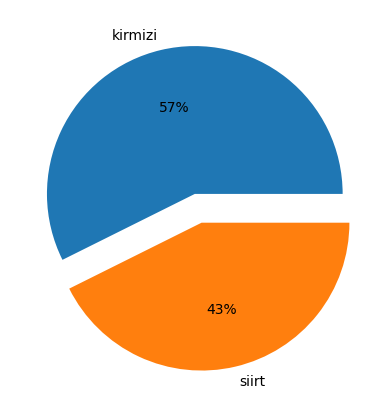

In [6]:
data = [len(os.listdir(kirmizi_path)), len(os.listdir(siirt_path))]
keys = ['kirmizi', 'siirt']

explode = [0,0.2]

plt.pie(x=data, labels=keys, explode=explode, autopct='%.0f%%');

# Summary (So far)

*   There are a total of 2148 images of which 1232 below to kirmizi pistachios and 916 belonging to siirt.

*   The data set is slightly imbalanced, there are more kirmiziz than siirt pistachios

*   I read on stack overflow, https://stackoverflow.com/questions/44504963/imbalanced-classes-in-convolutional-neural-networks, I can turn class weights on in the model to giving more weightage to the minority class, which I will do.

*   Confirming this on the tensorflow website, https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit, there is class_weight parameter in model.fit()

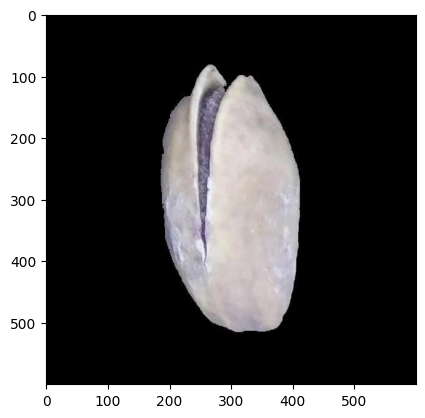

In [7]:
temp_kirmizi = kirmizi_path + '/' + os.listdir(kirmizi_path)[0]
plt.imshow(imread(temp_kirmizi));

In [8]:
imread(temp_kirmizi).shape

(600, 600, 3)

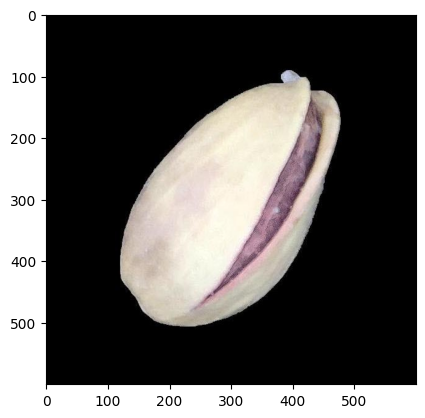

In [9]:
temp_siirt = siirt_path + '/' + os.listdir(siirt_path)[0]
plt.imshow(imread(temp_siirt));

In [10]:
imread(temp_siirt).shape

(600, 600, 3)

In [11]:
kirmizi_max = 0
siirt_max = 0

for i, j in zip(os.listdir(kirmizi_path), os.listdir(siirt_path)):

  temp_kirmizi_path = kirmizi_path + '/' + i
  temp_siirt_path = siirt_path + '/' + j

  if imread(temp_kirmizi_path).max() > kirmizi_max:
    kirmizi_max = imread(temp_kirmizi_path).max()

  if imread(temp_siirt_path).max() > siirt_max:
    siirt_max = imread(temp_siirt_path).max()

print(kirmizi_max, siirt_max)

255 255


# Summary (So far)

*   This is how a kirmiziz and siirt pistachio look like respectively

*   The red, green and blue (RGB) images have a width and height of 600 pixels

*   The maximum value of each image is 255 therefore the data will be normalized by dividing all the values by 255.

# Train Test Split

*   I learnt of this library, splitfolders https://pypi.org/project/split-folders/, that functions as train_test_split for images

*   I did more research on this site: https://stackoverflow.com/questions/53074712/how-to-split-folder-of-images-into-test-training-validation-sets-with-stratified

*   I will split my data into train and test, 80:20, without a validation set due to the limited number of images




In [12]:
splitfolders.ratio(input='./Pistachio_Image_Dataset/Pistachio_Image_Dataset',
                   output='./Data',
                   seed=42,
                   ratio=(0.8,0.2))

Copying files: 0 files [00:00, ? files/s]

Copying files: 2148 files [00:04, 497.73 files/s] 
